## Bayesian Data Analysis, solved exercises

In this notebook I go through few exercices from the book Bayesian Data Analysis, third Edition, Andrew Gelman, John B. Carlin, Hal S. Stern, David B. Dunson, Aki Vehtari, and Donald B. Rubin. 

The idea is to guide a starter in the subject, going very slow and show all the steps by combining it to python implementations. Fell free to fork and collaborate with few answers, and help me to check my ones.

Soluction to the problems by Carlos C. N. Kuhn \
carlosclaitonkuhn@gmail.com

### 1.12 Exercices

#### 1. Conditional probability: suppose that if $\theta=1$, then $y$ has a normal distribution with mean 1 and standard deviation $\sigma$, and if $\theta=2$, then $y$ has a normal distribution with mean 2 and standard deviation $\sigma$. Also, suppose $\mathrm{Pr}(\theta=1)=0.5$  and $\mathrm{Pr}(\theta=2)=0.5$ .

#### (a) For $\sigma=2$, write the formula for the marginal probability density for $y$ and sketch it.

Answer: a normal distribution $N(\mu, \sigma)$ is a normalised gaussian distribution that has the form:
$$ p(y|\mu) = \frac{1}{\sigma\sqrt{2\pi}}\mathrm{e}^{-\left(\frac{y-\mu}{\sqrt{2}\sigma}\right)^2}$$

for us now $\mu = \theta$, then we have

$$ p(y) = \mathrm{Pr(\theta=1)}p(y|\mu=\theta=1)+\mathrm{Pr(\theta=2)}p(y|\mu=\theta=2)$$

checking normalization = 0.9989999904426634 


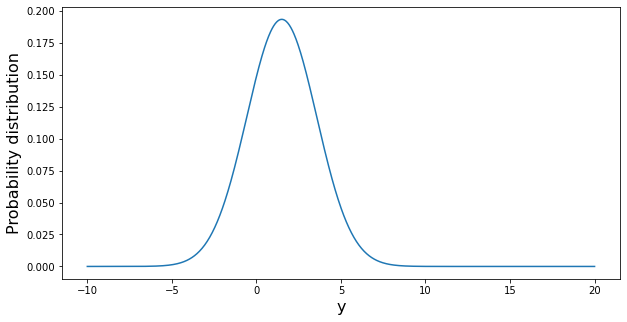

In [140]:
import numpy as np
import matplotlib.pyplot as plt

# create a module that returns the N(\mu,\sigma^2)
def gauss(mean,sigma, x):
    dist = np.exp(-((x-mean)/(sigma*np.sqrt(2)))**2)/(sigma*np.sqrt(2*np.pi))
    return dist

y=np.linspace(-10,20,1000)
P_y = 0.5*gauss(1,2,y)+0.5*gauss(2,2,y)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(y,P_y)
plt.xlabel('y', size=16)
plt.ylabel('Probability distribution',size=16)

# checking if the integration is 1
dy = np.unique(np.round(np.diff(y),2))
print(f'checking normalization = {np.sum(P_y)*dy[0]} ' )

#### (b) What is Pr($\theta=1|y=1$), again supposing $\sigma=2$?

Here we need to compute all the prior (marginal probabilities) and then use Bayes' equation

$$\mathrm{Pr}(\theta=1|y) = \frac{p(y|\theta=1)\mathrm{Pr}(\theta=1)}{p(y|\theta=1)\mathrm{Pr}(\theta=1)+p(y|\theta=2)\mathrm{Pr}(\theta=2)}$$

it is given $\mathrm{Pr}(\theta=1)=\mathrm{Pr}(\theta=2)=0.5$, then we need the $p(y=1|\theta=1)$, which we can get from the distribution above

In [83]:
p_y1_theta1 = round(gauss(1,2,1),2)
p_y1_theta2 = round(gauss(2,2,1),2)
print(f'p(y=1|theta=1) = {p_y1_theta1}')
print(f'p(y=1|theta=2) = {p_y1_theta2}')

# we then can put on the equation 

p(y=1|theta=1) = 0.2
p(y=1|theta=2) = 0.18


In [81]:
Pr_theta1_y1 = p_y1_theta1*0.5/(p_y1_theta1*0.5+p_y1_theta2*0.5)
Pr_theta2_y1 = p_y1_theta2*0.5/(p_y1_theta1*0.5+p_y1_theta2*0.5)
print(f'Pr(theta=1|y=1) = {round(Pr_theta1_y1,2)} ')
print(f'Pr(theta=2|y=1) = {round(Pr_theta2_y1,2)} ')

Pr(theta=1|y=1) = 0.53 
Pr(theta=2|y=1) = 0.47 


#### (c) Describe how the posterior density of $\theta$ changes in shape as $\sigma$ is increased and as it is decreased.
Answer: 

#### 3. Probability calculation for genetics (from Lindley, 1965): suppose that in each individual of a large population there is a pair of genes, each of which can be either $x$ or $X$, that controls eye color: those with $xx$ have blue eyes, while heterozygotes (those with $Xx$ or $xX$) and those with $XX$ have brown eyes. The proportion of blue-eyed individuals is $p^2$ and of heterozygotes is $2p(1 − p)$, where $0 < p < 1$. Each parent transmits one of its own genes to the child; if a parent is a heterozygote, the probability that it transmits the gene of type $X$ is $1/2$. Assuming random mating, show that among brown-eyed children of brown-eyed parents, the expected proportion of heterozygotes is $2p/(1+2p)$. Suppose Judy, a brown-eyed child of brown-eyed parents, marries a heterozygote, and they have $n$ children, all brown-eyed. Find the posterior probability that Judy is a heterozygote and the probability that her first grandchild has blue eyes.

#### 4. Probability assignment: we will use the football dataset to estimate some conditional probabilities about professional football games. There were twelve games with point spreads of 8 points; the outcomes in those games were: −7, −5, −3, −3, 1, 6, 7, 13, 15, 16, 20, and 21, with positive values indicating wins by the favorite and negative values indicating wins by the underdog. Consider the following conditional probabilities:

#### Pr(Favorite wins | point spread = 8)
#### Pr(favorite wins by at least 8 | point spread = 8);
#### Pr(favorite wins by at least 8 | point spread = 8 and favorite wins).


#### 4.a Estimate each of these using the relative frequencies of games with ta point spread of 8.

we need to know the number of positives in the distribution of outcomes to get the number of wins = 8 positives outcome.
we also need the number of total games = 12

$\mathrm{Pr(Favorite \, wins | point \, spread = 8)} = \frac{\mathrm{\# \,of\, Favorite\, wins}}{\mathrm{\#\, of\, point\, spread = 8}} = \frac{8}{12} = 0.67$ 

$\mathrm{Pr(Favorite \,wins\,by\,at\,least\,8 | point \, spread = 8)} = \frac{5}{12} = 0.42$ 

$\mathrm{Pr(Favorite \,wins \,by\,at\,least\,8 | point \, spread = 8\, and\, favority\, wins )} = \frac{5}{8} = 0.63$ 


#### 4.b Estimate each using the normal approximation for the distribution of (outcome - point spread)

First I need to fit a Gaussian distribution to the data. As this is about Baysian Inference, lets use Baysian Inference and MMC to fit the data to a Normal distribution and MMC. I will use the script made by Joseph Moukarzel, whcih can be find at https://github.com/Joseph94m/MCMC.


In [166]:
# get the  data-spread points
outcome = np.array([-7,-5,-3,-3,1,6,7,13,15,16,20,21])-8


# Copyright (c) 2019 Plessia Stanislas
# The tranistion model defines how to move from sigma_current to sigma_new
transition_model = lambda x: [x[0],np.random.normal(x[1],1,(1,))[0]]

def prior(x):
    #x[0] = mu, x[1]=sigma (new or current)
    #returns 1 for all valid values of sigma. Log(1) =0, so it does not affect the summation.
    #returns 0 for all invalid values of sigma (<=0). Log(0)=-infinity, and Log(negative number) is undefined.
    #It makes the new sigma infinitely unlikely.
    if(x[1] <=0):
        return 0
    return 1

#Computes the likelihood of the data using scipy implementation. It's pretty slow.
def log_lik_normal(x,data):
    #x[0]=mu, x[1]=sigma (new or current)
    #data = the observation
    return np.sum(np.log(stats.norm(x[0],x[1]).pdf(data)))


#Defines whether to accept or reject the new sample
def acceptance(x, x_new):
    if x_new>x:
        return True
    else:
        accept=np.random.uniform(0,1)
        # Since we did a log likelihood, we need to exponentiate in order to compare to the random number
        # less likely x_new are less likely to be accepted
        return (accept < (np.exp(x_new-x)))


def metropolis_hastings(likelihood_computer,prior, transition_model, param_init,iterations,data,acceptance_rule):
    # likelihood_computer(x,data): returns the likelihood that these parameters generated the data
    # transition_model(x): a function that draws a sample from a symmetric distribution and returns it
    # param_init: a starting sample
    # iterations: number of accepted to generated
    # data: the data that we wish to model
    # acceptance_rule(x,x_new): decides whether to accept or reject the new sample
    x = param_init
    accepted = []
    rejected = []   
    for i in range(iterations):
        x_new =  transition_model(x)    
        x_lik = likelihood_computer(x,data)
        x_new_lik = likelihood_computer(x_new,data) 
        if (acceptance_rule(x_lik+np.log(prior(x)),x_new_lik+np.log(prior(x_new)))):            
            x = x_new
            accepted.append(x_new)
        else:
            rejected.append(x_new)            
                
    return np.array(accepted), np.array(rejected)

accepted, rejected = metropolis_hastings(log_lik_normal,prior,transition_model,[0,13.86],5000,outcome,acceptance)

[-15 -13 -11 -11  -7  -2  -1   5   7   8  12  13]


0.0 11.11424944976261


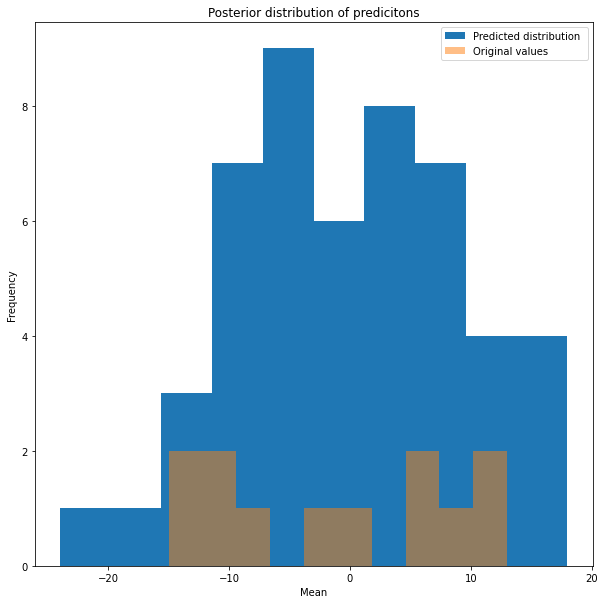

In [178]:
#get the last 75% of the accepted fited values to calculate the mean to use as our model
show=int(-0.75*accepted.shape[0])
hist_show=int(-0.75*accepted.shape[0])
mu=accepted[show:,0].mean()
sigma=accepted[show:,1].mean()
print(mu, sigma)

model = lambda t,mu,sigma:np.random.normal(mu,sigma,t)
observation_gen=model(50,mu,sigma)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.hist( observation_gen,bins=10 ,label="Predicted distribution ")
ax.hist( outcome,bins=10 ,alpha=0.5, label="Original values ")
ax.set_xlabel("Mean")
ax.set_ylabel("Frequency")
ax.set_title("Posterior distribution of predicitons")
ax.legend()

it is clear that I don't have enough data to get a good fit, and in this case it is a bid approximation. Anyway, we are going to take the distribution to be $d=y-\mathrm{spread\,points} \rightarrow d|\mathrm{spread\,points} \approx N(0,11^2)$. Note as our model has mean to be zero, the probability of favority wins is $1/2$, it is the area on the positive side of the distribution. 

$$\mathrm{Pr(favorite\,wins|spread\,points=8)} = \mathrm{Pr(y>0|spread\,points=8)} = \mathrm{Pr(d>-spread\,points|spread\,points=8)}$$

$$\mathrm{Pr(d>-spread\,points|spread\,points=8)} = 1 - CDF(-\mathrm{spread\,points}) = CDF(\mathrm{spread\,points})$$

In [226]:

# using the stats normal distribution we can have
print(f'Using scipy.stats:')
print(f'Pr(favorite wins|spread points = 8) = CDF(8) = {stats.norm(0, sigma).cdf(8)}')
print(f'Pr(favorite wins at list 8|spread points = 8) = CDF(0) = {stats.norm(0, sigma).cdf(0)}')
print(f'Pr(favorite wins at list 8|spread points = 8 and favorite wins) = CDF(0) = {stats.norm(0, sigma).cdf(0)/stats.norm(0, sigma).cdf(8)}')

# using manualy 
# define a module to calculate the CDF (cumulative distribution function)
def cdf_pr(sig, x):
    y=np.linspace(-50,50,10000)
    Pr_y = gauss(0,sig,y)
    dy = np.unique(np.round(np.diff(y),2))
    cdf = np.sum(Pr_y[np.where(y<x)])*dy
    return cdf[0]
print()
print(f'Using my functions:')
print(f'Pr(favorite wins|spread points = 8) = CDF(8) = {cdf_pr(sigma,8)}')
print(f'Pr(favorite wins at list 8|spread points = 8) = CDF(0) = {cdf_pr(sigma,0)}')
print(f'Pr(favorite wins at list 8|spread points = 8 and favorite wins) = CDF(0) = {cdf_pr(sigma,0)/cdf_pr(sigma,8)}')



Using scipy.stats:
Pr(favorite wins|spread points = 8) = CDF(8) = 0.7641749093483567
Pr(favorite wins at list 8|spread points = 8) = CDF(0) = 0.5
Pr(favorite wins at list 8|spread points = 8 and favorite wins) = CDF(0) = 0.6543004669263094

Using my functions:
Pr(favorite wins|spread points = 8) = CDF(8) = 0.7641172505627278
Pr(favorite wins at list 8|spread points = 8) = CDF(0) = 0.4999465895274767
Pr(favorite wins at list 8|spread points = 8 and favorite wins) = CDF(0) = 0.6542799408851131
